<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/0216/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import csv
import os

file_path = '/content/drive/MyDrive/1stSeries_07.05.21/1.3/W0000.CSV'

f = open(file_path, 'rt')
reader = csv.reader(f)
csv_content = [raw for raw in reader]
f.close()
df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
df = df.astype(float)
df.columns = ['X', 'Y']
print(df)


              X             Y
0     1475.0000  7.976000e-07
1     1475.0198  9.544000e-07
2     1475.0397  5.796000e-07
3     1475.0595  1.106000e-06
4     1475.0794  6.473000e-07
...         ...           ...
6296  1599.9206  6.443000e-07
6297  1599.9405  8.647000e-07
6298  1599.9603  9.092000e-07
6299  1599.9802  7.652000e-07
6300  1600.0000  6.929000e-07

[6301 rows x 2 columns]


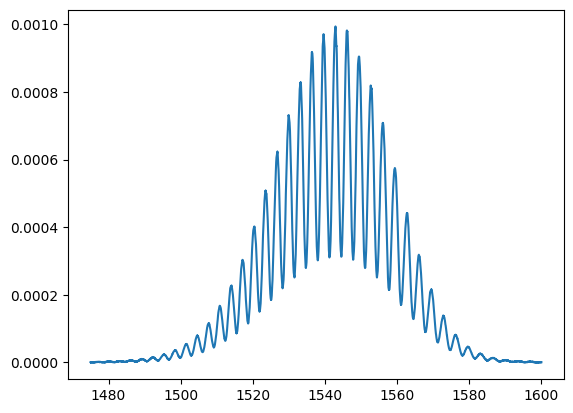

In [2]:
import matplotlib.pyplot as plt
plt.plot(df['X'], df['Y'])

Normal

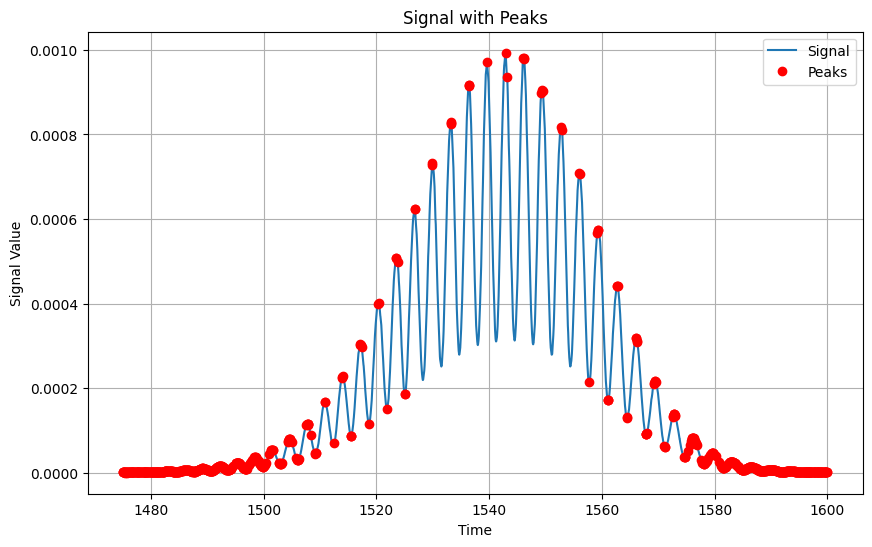

In [3]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(df['Y'])

peak_values = df['Y'][peaks]
peak_times = df['X'][peaks]

plt.figure(figsize=(10, 6))
plt.plot(df['X'], df['Y'], label='Signal')
plt.plot(peak_times, peak_values, 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Signal with Peaks')
plt.legend()
plt.grid(True)
plt.show()

Signal Smoothing - Gaussian


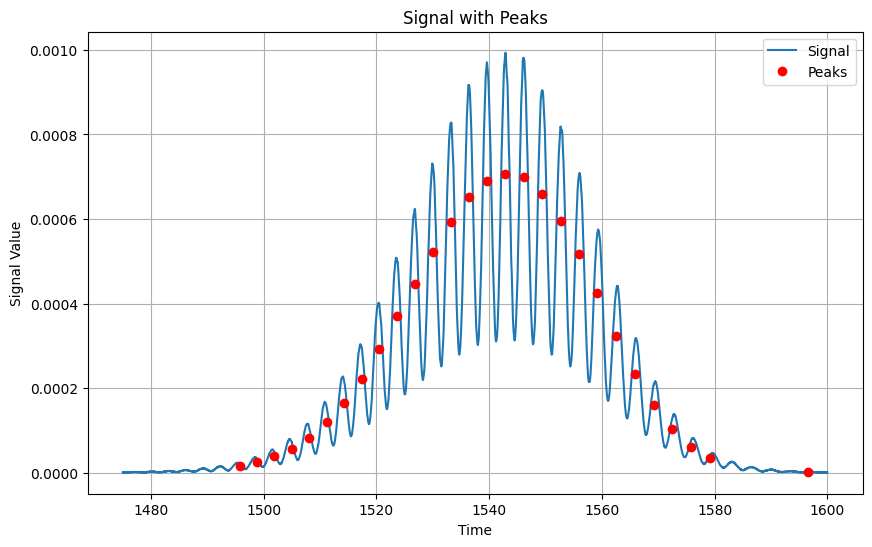

In [4]:
from scipy.ndimage import gaussian_filter

smoothed_signal = gaussian_filter(df['Y'], sigma=50)
peaks, _ = find_peaks(smoothed_signal)

peak_values = smoothed_signal[peaks]
peak_times = df['X'][peaks]

plt.figure(figsize=(10, 6))
plt.plot(df['X'], df['Y'], label='Signal')
plt.plot(peak_times, peak_values, 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Signal with Peaks')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import numpy as np
time_diff = np.diff(peak_times)

print(time_diff)

mean_signal_peak = np.mean(time_diff)
print(mean_signal_peak)
length_signal_peak = len(time_diff)
print(length_signal_peak)
min_signal_peak = np.min(time_diff)
print(min_signal_peak)
std_signal_peak = np.std(time_diff)
print(std_signal_peak)

analysis_value = pd.DataFrame(np.array([[std_signal_peak, min_signal_peak, mean_signal_peak]]))
print(analysis_value)

[ 3.0159  2.996   3.0754  3.1151  3.0754  3.0952  3.135   3.1547  3.1349
  3.1548  3.1944  3.2143  3.1945  3.2143  3.2539  3.2342  3.2539  3.2937
  3.2738  3.2738  3.3135  3.3135  3.3333  3.3135  3.3135  3.373  17.3214]
3.727218518518519
27
2.9960000000000946
2.6678656575423996
          0      1         2
0  2.667866  2.996  3.727219


In [6]:
import pandas as pd
import csv
from scipy.ndimage import gaussian_filter

base_directory = '/content/drive/MyDrive/1stSeries_07.05.21'

all_csv_X = []
all_csv_Y = []

for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('.CSV') and file != 'REF.CSV':
            file_path = os.path.join(root, file)

            with open(file_path, 'rt') as f:
                reader = csv.reader(f)
                csv_content = [raw for raw in reader]
            f.close()
            df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
            df = df.astype(float)
            df.columns = ['X', 'Y']
            Y = float(os.path.basename(root))
            all_csv_X.append(df)
            all_csv_Y.append(Y)


In [7]:
Y = pd.DataFrame(all_csv_Y, columns=['Y'])
len(Y)

231

In [9]:
import numpy as np

analysis_values = []
for df, label in zip(all_csv_X, all_csv_Y):
    smoothed_signal = gaussian_filter(df['Y'], sigma=50)
    peaks, _ = find_peaks(smoothed_signal)

    peak_values = df['Y'][peaks].reset_index(drop=True)
    peak_times = df['X'][peaks].reset_index(drop=True)

    time_diff = np.diff(peak_times)
    std_signal_peak = np.std(time_diff)
    mean_signal_peak = np.mean(time_diff)
    min_signal_peak = np.min(time_diff)
    analysis_values.append([std_signal_peak, min_signal_peak, mean_signal_peak])

data = pd.DataFrame(analysis_values, columns=['std', 'min', 'mean'])
print(analysis_value)
print(data)

          0      1         2
0  2.667866  2.996  3.727219
          std     min      mean
0    0.045589  2.8572  2.921078
1    0.039792  2.8770  2.927689
2    0.037556  2.8769  2.927689
3    0.038693  2.8769  2.927689
4    0.046864  2.8571  2.925489
..        ...     ...       ...
226  0.101618  2.5794  2.750000
227  0.072224  2.6786  2.787700
228  0.108242  2.5595  2.742060
229  0.061741  2.6985  2.792675
230  0.056778  2.6984  2.792650

[231 rows x 3 columns]


In [10]:
spectrum_data = pd.concat([data, Y], axis=1)
print(spectrum_data)


          std     min      mean     Y
0    0.045589  2.8572  2.921078  1.41
1    0.039792  2.8770  2.927689  1.41
2    0.037556  2.8769  2.927689  1.41
3    0.038693  2.8769  2.927689  1.41
4    0.046864  2.8571  2.925489  1.41
..        ...     ...       ...   ...
226  0.101618  2.5794  2.750000  1.44
227  0.072224  2.6786  2.787700  1.44
228  0.108242  2.5595  2.742060  1.44
229  0.061741  2.6985  2.792675  1.44
230  0.056778  2.6984  2.792650  1.44

[231 rows x 4 columns]


In [11]:
from sklearn.model_selection import train_test_split
XX = spectrum_data[['std', 'min', 'mean']]
YY = spectrum_data['Y']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_s = le.fit_transform(YY)

X_train, X_test, y_train, y_test = train_test_split(XX, Y_s, test_size=0.3, train_size=0.7, random_state=123)
print(X_train.shape)
print(y_train.shape)

(161, 3)
(161,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
knn = KNeighborsClassifier(n_neighbors=1)
xgb = XGBClassifier(n_estimators=20, learning_rate=0.2, max_depth=30, objective='multi:softmax')
knn.fit(X_train, y_train)
xgb.fit(X_train, y_train)

predicted_labels_knn = knn.predict(X_test)
predicted_labels_xgb = xgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, predicted_labels_knn)
print(f"Accuracy: {accuracy_knn}")
accuracy_xgb = accuracy_score(y_test, predicted_labels_xgb)
print(f"Accuracy: {accuracy_xgb}")

Accuracy: 0.8571428571428571
Accuracy: 0.7714285714285715
